In [1]:
import pandas as pd
history = pd.read_csv("C:/Users/91944/Downloads/Mastercard_stock_history.csv")

In [2]:
import os
print(os.getcwd())


C:\Users\91944


In [3]:
dividend=pd.read_csv("C:/Users/91944/Downloads/Mastercard_stock_dividends.csv")
action=pd.read_csv("C:/Users/91944/Downloads/Mastercard_stock_action.csv")
info=pd.read_csv("C:/Users/91944/Downloads/Mastercard_stock_info.csv")
splits=pd.read_csv("C:/Users/91944/Downloads/Mastercard_stock_spilts.csv")

In [4]:
history.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25 00:00:00-04:00,3.677800,4.202548,3.668674,4.197985,395343000,0.0,0.0
1,2006-05-26 00:00:00-04:00,4.225363,4.265517,4.025502,4.100336,103044000,0.0,0.0
2,2006-05-30 00:00:00-04:00,4.103990,4.104902,3.910517,4.015467,49898000,0.0,0.0
3,2006-05-31 00:00:00-04:00,4.047406,4.139579,4.047406,4.101250,30002000,0.0,0.0
4,2006-06-01 00:00:00-04:00,4.100334,4.389630,4.097596,4.335786,62344000,0.0,0.0


In [5]:
history.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
history['Date'] = pd.to_datetime(history['Date'], utc=True).dt.tz_localize(None)
history=history.sort_values('Date')

In [7]:
history['Return']=history['Close'].pct_change()

In [8]:
print(history['Return'])

0            NaN
1      -0.023261
2      -0.020698
3       0.021363
4       0.057186
          ...   
4728   -0.002206
4729   -0.009168
4730    0.015024
4731    0.008244
4732   -0.006833
Name: Return, Length: 4733, dtype: float64


In [9]:
history['Close_Lag1'] = history['Close'].shift(1)
history['Return_Lag1'] = history['Return'].shift(1)

In [10]:
print(history['Close_Lag1'])

0              NaN
1         4.197985
2         4.100336
3         4.015467
4         4.101250
           ...    
4728    525.799988
4729    524.640015
4730    519.830017
4731    527.640015
4732    531.989990
Name: Close_Lag1, Length: 4733, dtype: float64


In [11]:
history['MA7'] = history['Close'].rolling(window=7).mean()
history['MA30'] = history['Close'].rolling(window=30).mean()

# Volatility (rolling std)
history['Volatility_7'] = history['Return'].rolling(window=7).std()

In [12]:
history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Close_Lag1,Return_Lag1,MA7,MA30,Volatility_7
0,2006-05-25 04:00:00,3.677800,4.202548,3.668674,4.197985,395343000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-05-26 04:00:00,4.225363,4.265517,4.025502,4.100336,103044000,0.0,0.0,-0.023261,4.197985,NaN,NaN,NaN,NaN
2,2006-05-30 04:00:00,4.103990,4.104902,3.910517,4.015467,49898000,0.0,0.0,-0.020698,4.100336,-0.023261,NaN,NaN,NaN
3,2006-05-31 04:00:00,4.047406,4.139579,4.047406,4.101250,30002000,0.0,0.0,0.021363,4.015467,-0.020698,NaN,NaN,NaN
4,2006-06-01 04:00:00,4.100334,4.389630,4.097596,4.335786,62344000,0.0,0.0,0.057186,4.101250,0.021363,NaN,NaN,NaN


In [13]:
history['Target_Close'] = history['Close'].shift(-1)

In [14]:
history.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Close_Lag1,Return_Lag1,MA7,MA30,Volatility_7,Target_Close
0,2006-05-25 04:00:00,3.677800,4.202548,3.668674,4.197985,395343000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.100336
1,2006-05-26 04:00:00,4.225363,4.265517,4.025502,4.100336,103044000,0.0,0.0,-0.023261,4.197985,NaN,NaN,NaN,NaN,4.015467
2,2006-05-30 04:00:00,4.103990,4.104902,3.910517,4.015467,49898000,0.0,0.0,-0.020698,4.100336,-0.023261,NaN,NaN,NaN,4.101250
3,2006-05-31 04:00:00,4.047406,4.139579,4.047406,4.101250,30002000,0.0,0.0,0.021363,4.015467,-0.020698,NaN,NaN,NaN,4.335786
4,2006-06-01 04:00:00,4.100334,4.389630,4.097596,4.335786,62344000,0.0,0.0,0.057186,4.101250,0.021363,NaN,NaN,NaN,4.288331


In [15]:
history=history.dropna()

In [16]:
history.head(20)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Close_Lag1,Return_Lag1,MA7,MA30,Volatility_7,Target_Close
29,2006-07-07 04:00:00,4.266430,4.275556,4.175169,4.208936,8380000,0.0,0.0,-0.014530,4.270992,-0.016807,4.312452,4.247448,0.014163,4.242702
30,2006-07-10 04:00:00,4.216236,4.250003,4.208935,4.242702,4978000,0.0,0.0,0.008023,4.208936,-0.014530,4.306324,4.248939,0.014655,4.229927
31,2006-07-11 04:00:00,4.242703,4.242703,4.134103,4.229927,8079000,0.0,0.0,-0.003011,4.242702,0.008023,4.284813,4.253258,0.010402,4.156916
32,2006-07-12 04:00:00,4.234488,4.234488,4.156004,4.156916,7672000,0.0,0.0,-0.017260,4.229927,-0.003011,4.252871,4.257973,0.011061,4.081172
33,2006-07-13 04:00:00,4.123152,4.123152,4.042842,4.081172,16625000,0.0,0.0,-0.018221,4.156916,-0.017260,4.219235,4.257304,0.011530,4.010901
34,2006-07-14 04:00:00,4.072045,4.077521,4.006338,4.010901,9663000,0.0,0.0,-0.017218,4.081172,-0.018221,4.171649,4.246475,0.010011,4.014552
35,2006-07-17 04:00:00,4.007250,4.030978,3.992649,4.014552,6458000,0.0,0.0,0.000910,4.010901,-0.017218,4.135015,4.237349,0.010605,4.006337
36,2006-07-18 04:00:00,4.014550,4.024589,3.985347,4.006337,12483000,0.0,0.0,-0.002046,4.014552,0.000910,4.106072,4.221378,0.010522,4.132277
37,2006-07-19 04:00:00,4.007250,4.147791,3.997212,4.132277,15840000,0.0,0.0,0.031435,4.006337,-0.002046,4.090297,4.212191,0.017495,4.156916
38,2006-07-20 04:00:00,4.143227,4.177906,4.115849,4.156916,8829000,0.0,0.0,0.005963,4.132277,0.031435,4.079867,4.205955,0.017872,4.132277


In [17]:
features = ['Close_Lag1', 'Return_Lag1', 'MA7', 'MA30', 'Volatility_7', 'Volume']
X = history[features]
y = history['Target_Close']

In [18]:
history['Target'] = (history['Close'].shift(-1) > history['Close']).astype(int)

In [19]:
history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Close_Lag1,Return_Lag1,MA7,MA30,Volatility_7,Target_Close,Target
29,2006-07-07 04:00:00,4.266430,4.275556,4.175169,4.208936,8380000,0.0,0.0,-0.014530,4.270992,-0.016807,4.312452,4.247448,0.014163,4.242702,1
30,2006-07-10 04:00:00,4.216236,4.250003,4.208935,4.242702,4978000,0.0,0.0,0.008023,4.208936,-0.014530,4.306324,4.248939,0.014655,4.229927,0
31,2006-07-11 04:00:00,4.242703,4.242703,4.134103,4.229927,8079000,0.0,0.0,-0.003011,4.242702,0.008023,4.284813,4.253258,0.010402,4.156916,0
32,2006-07-12 04:00:00,4.234488,4.234488,4.156004,4.156916,7672000,0.0,0.0,-0.017260,4.229927,-0.003011,4.252871,4.257973,0.011061,4.081172,0
33,2006-07-13 04:00:00,4.123152,4.123152,4.042842,4.081172,16625000,0.0,0.0,-0.018221,4.156916,-0.017260,4.219235,4.257304,0.011530,4.010901,0


In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<Axes: >

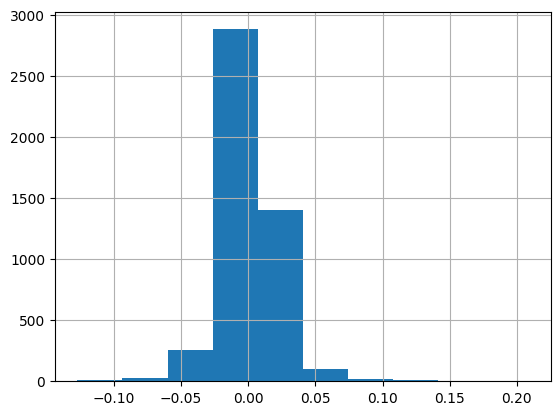

In [22]:
history['Return'].hist()

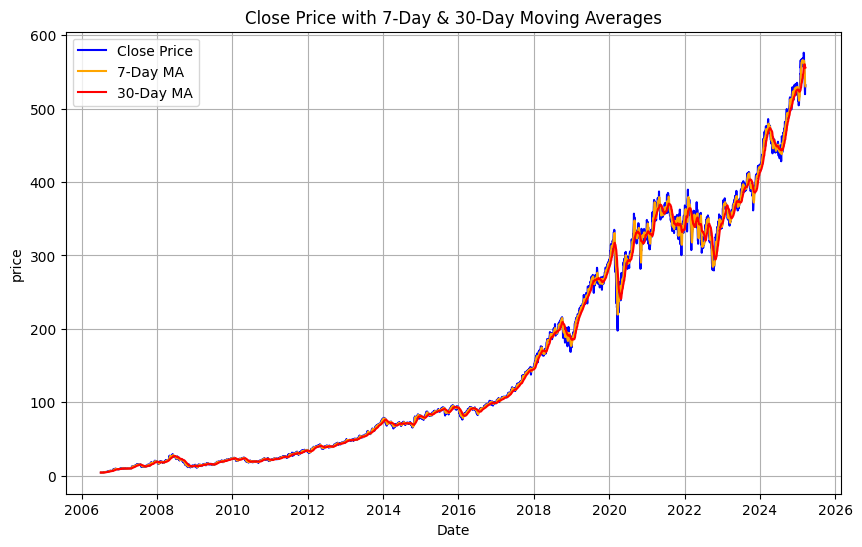

In [23]:
plt.figure(figsize=(10,6))
plt.plot(history['Date'],history['Close'],label='Close Price',color='blue')
plt.plot(history['Date'],history['MA7'],label='7-Day MA', color='orange')
plt.plot(history['Date'],history['MA30'],label='30-Day MA',color='red')
plt.title('Close Price with 7-Day & 30-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()

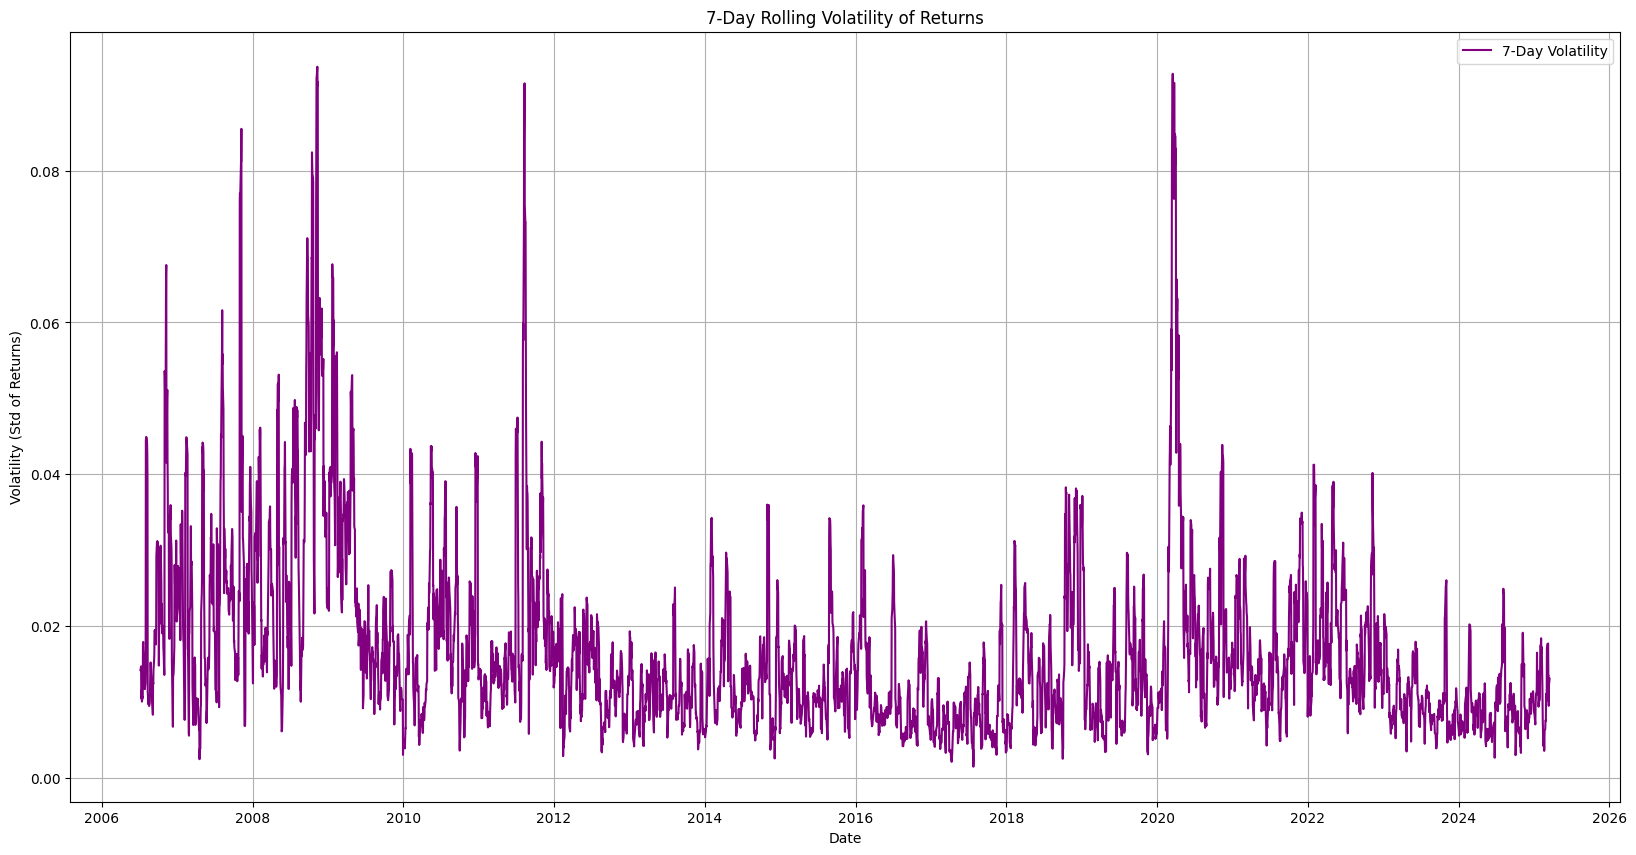

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(history['Date'], history['Volatility_7'], color='purple', label='7-Day Volatility')

plt.title('7-Day Rolling Volatility of Returns')
plt.xlabel('Date')
plt.ylabel('Volatility (Std of Returns)')
plt.legend()
plt.grid(True)
plt.show()


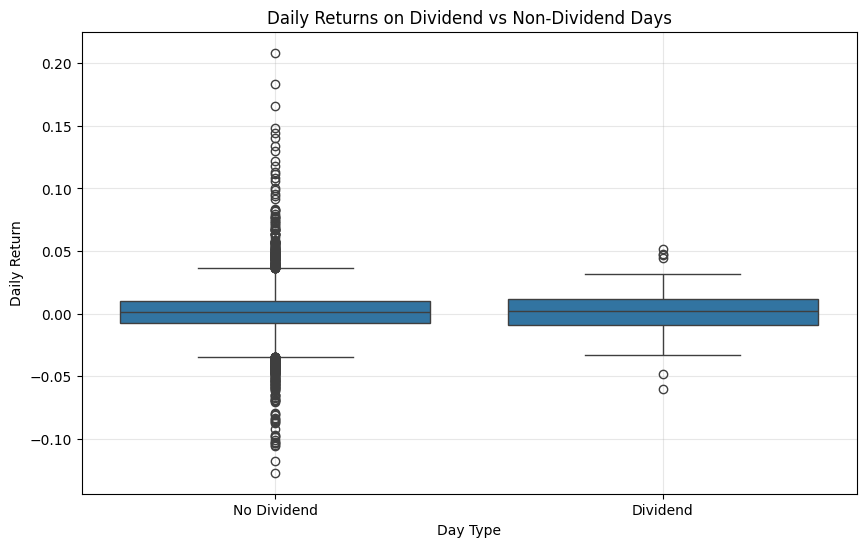

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

history['Dividends_Flag'] = (history['Dividends'] > 0).astype(int)

# Compare returns distribution on dividend vs non-dividend days
plt.figure(figsize=(10,6))
sns.boxplot(x='Dividends_Flag', y='Return', data=history)
plt.xticks([0,1], ['No Dividend', 'Dividend'])
plt.title('Daily Returns on Dividend vs Non-Dividend Days')
plt.xlabel('Day Type')
plt.ylabel('Daily Return')
plt.grid(True, alpha=0.3)
plt.show()


In [26]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


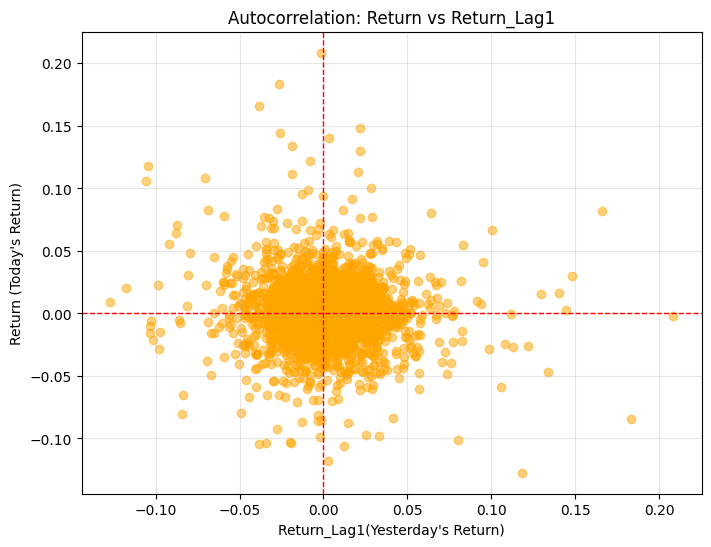

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(history['Return_Lag1'],history['Return'],alpha=0.5,color='orange')
plt.title("Autocorrelation: Return vs Return_Lag1")
plt.xlabel("Return_Lag1(Yesterday's Return)")
plt.ylabel("Return (Today's Return)")
plt.grid(True, alpha=0.3)
plt.axhline(0, color='red',linestyle='--',linewidth=1)
plt.axvline(0,color='red',linestyle='--',linewidth=1)
plt.show()

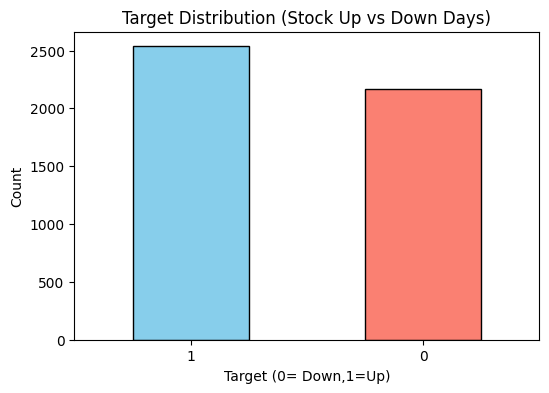

Target distribution:
Target
1    2536
0    2167
Name: count, dtype: int64 

Percentage distribution:
Target
1    53.923028
0    46.076972
Name: count, dtype: float64


In [28]:
target_counts=history['Target'].value_counts()
plt.figure(figsize=(6,4))
target_counts.plot(kind="bar",color=["skyblue","salmon"],edgecolor="black")
plt.title("Target Distribution (Stock Up vs Down Days)")
plt.xlabel("Target (0= Down,1=Up)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

print("Target distribution:")
print(target_counts,"\n")
print("Percentage distribution:")
print(target_counts /len(history)*100)

Average return when target = 1 (UP): 0.0005514652636513067
Average return when target = 0 (Down) 0.0020415259045756763


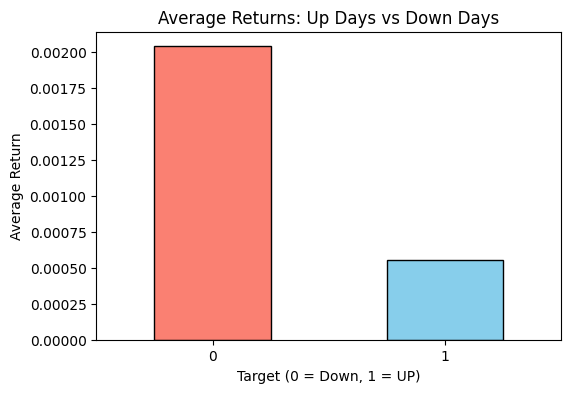

In [29]:
avg_returns = history.groupby('Target')['Return'].mean()
print("Average return when target = 1 (UP):",avg_returns[1])
print("Average return when target = 0 (Down)",avg_returns[0])
avg_returns.plot(kind="bar",color=["Salmon","skyblue"], edgecolor="black",figsize=(6,4))
plt.title("Average Returns: Up Days vs Down Days")
plt.xlabel("Target (0 = Down, 1 = UP)")
plt.ylabel("Average Return")
plt.xticks(rotation=0)
plt.show()


In [30]:
corr=history[['Return','Return_Lag1']].corr()
print(corr)

              Return  Return_Lag1
Return       1.00000     -0.06627
Return_Lag1 -0.06627      1.00000


In [31]:
import statsmodels.api as sm
df=history[['Return','Return_Lag1']].dropna()
x=sm.add_constant(df['Return_Lag1'])
y=df['Return']

model =sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Return   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.024
Method:                 Least Squares   F-statistic:                              19.98
Date:                Sat, 30 Aug 2025   Prob (F-statistic):                    3.44e-23
Time:                        14:41:37   Log-Likelihood:                          11624.
No. Observations:                4703   AIC:                                 -2.324e+04
Df Residuals:                    4697   BIC:                                 -2.320e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [32]:
pip install statsmodels

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = history[['Return_Lag1']].dropna()
y = history['Target'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("Coefficient for Return_Lag1:", model.coef_)


Accuracy: 0.5260361317747078
Coefficient for Return_Lag1: [[0.40097426]]


In [34]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
 history['Return_Lag2']= history['Return'].shift(2)
history=history.dropna()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Features and target
X= history[['Return_Lag2']]
y=history['Target']

#train and test split
split=int(len(history)*0.8)
X_train,X_test = X[:split],X[split:]
y_train,y_test = y[:split],y[split:]

model= LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
y_pred=model.predict(X_test)

In [38]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Coefficient for Return_Lag2:",model.coef_)

Accuracy: 0.5260361317747078
Coefficient for Return_Lag2: [[-0.32195335]]


In [39]:
history['Return_Lag3'] = history['Return'].shift(3)

In [40]:
history=history.dropna()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

X=history[['Return_Lag1','Return_Lag2','Return_Lag3']]
y=history['Target']

split=int(len(history)*0.8)
X_train,X_test=X[:split],X[split:]
y_train,y_test=y[:split],y[split:]

model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
y_pred=model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Coefficients:",model.coef_)
print("Intercept",model.intercept_)

Accuracy: 0.5255319148936171
Coefficients: [[ 0.38478245 -0.32465691 -0.70204596]]
Intercept [0.17377058]


In [43]:
features = ["Return_Lag1", "Return_Lag2", "Return_Lag3", 
            "MA7", "MA30", "Volatility_7"]

X = history[features]
y = history["Target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Accuracy: 0.5255319148936171
Coefficients: [[ 4.23543041e-01 -3.38654099e-01 -7.44132083e-01 -1.83913916e-04
   5.91620332e-04 -6.95181151e-01]]
Intercept: [0.146971]


In [44]:
dividend

,Date,Dividends
0,2006-10-05 00:00:00-04:00,0.009
1,2007-01-10 00:00:00-05:00,0.009
2,2007-04-04 00:00:00-04:00,0.015
3,2007-06-29 00:00:00-04:00,0.015
4,2007-10-17 00:00:00-04:00,0.015
...,...,...
69,2024-01-08 00:00:00-05:00,0.660
70,2024-04-08 00:00:00-04:00,0.660
71,2024-07-09 00:00:00-04:00,0.660
72,2024-10-09 00:00:00-04:00,0.660


In [45]:
splits

,Date,Stock Splits
0,2014-01-22 00:00:00-05:00,10.0


In [46]:
info

,address1,2000 Purchase Street
0,city,Purchase
1,state,NY
2,zip,10577
3,country,United States
4,phone,914 249 2000
...,...,...
168,averageAnalystRating,1.7 - Buy
169,cryptoTradeable,False
170,regularMarketChangePercent,-0.68328536
171,regularMarketPrice,528.355


In [47]:
action

,Date,Dividends,Stock Splits
0,2006-10-05 00:00:00-04:00,0.009,0.0
1,2007-01-10 00:00:00-05:00,0.009,0.0
2,2007-04-04 00:00:00-04:00,0.015,0.0
3,2007-06-29 00:00:00-04:00,0.015,0.0
4,2007-10-17 00:00:00-04:00,0.015,0.0
...,...,...,...
70,2024-01-08 00:00:00-05:00,0.660,0.0
71,2024-04-08 00:00:00-04:00,0.660,0.0
72,2024-07-09 00:00:00-04:00,0.660,0.0
73,2024-10-09 00:00:00-04:00,0.660,0.0


In [48]:
 history

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Close_Lag1,Return_Lag1,MA7,MA30,Volatility_7,Target_Close,Target,Dividends_Flag,Return_Lag2,Return_Lag3
34,2006-07-14 04:00:00,4.072045,4.077521,4.006338,4.010901,9663000,0.0,0.0,-0.017218,4.081172,-0.018221,4.171649,4.246475,0.010011,4.014552,1,0,-0.017260,-0.003011
35,2006-07-17 04:00:00,4.007250,4.030978,3.992649,4.014552,6458000,0.0,0.0,0.000910,4.010901,-0.017218,4.135015,4.237349,0.010605,4.006337,0,0,-0.018221,-0.017260
36,2006-07-18 04:00:00,4.014550,4.024589,3.985347,4.006337,12483000,0.0,0.0,-0.002046,4.014552,0.000910,4.106072,4.221378,0.010522,4.132277,1,0,-0.017218,-0.018221
37,2006-07-19 04:00:00,4.007250,4.147791,3.997212,4.132277,15840000,0.0,0.0,0.031435,4.006337,-0.002046,4.090297,4.212191,0.017495,4.156916,1,0,0.000910,-0.017218
38,2006-07-20 04:00:00,4.143227,4.177906,4.115849,4.156916,8829000,0.0,0.0,0.005963,4.132277,0.031435,4.079867,4.205955,0.017872,4.132277,0,0,-0.002046,0.000910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2025-03-11 04:00:00,537.200012,538.049988,522.250000,525.799988,4582600,0.0,0.0,-0.021075,537.119995,-0.017649,549.685713,559.794999,0.013396,524.640015,0,0,-0.005547,-0.015189
4728,2025-03-12 04:00:00,530.510010,532.710022,519.260010,524.640015,2810800,0.0,0.0,-0.002206,525.799988,-0.021075,542.502860,559.037667,0.013424,519.830017,0,0,-0.017649,-0.005547
4729,2025-03-13 04:00:00,524.500000,528.530029,517.710022,519.830017,2375800,0.0,0.0,-0.009168,524.640015,-0.002206,537.468576,558.072001,0.009452,527.640015,1,0,-0.021075,-0.017649
4730,2025-03-14 04:00:00,522.599976,528.409973,520.950012,527.640015,2369500,0.0,0.0,0.015024,519.830017,-0.009168,533.088579,556.793001,0.012157,531.989990,1,0,-0.002206,-0.021075


In [51]:

del history["Stock Splits"]

In [52]:
history

,Date,Open,High,Low,Close,Volume,Return,Close_Lag1,Return_Lag1,MA7,MA30,Volatility_7,Target_Close,Target,Dividends_Flag,Return_Lag2,Return_Lag3
34,2006-07-14 04:00:00,4.072045,4.077521,4.006338,4.010901,9663000,-0.017218,4.081172,-0.018221,4.171649,4.246475,0.010011,4.014552,1,0,-0.017260,-0.003011
35,2006-07-17 04:00:00,4.007250,4.030978,3.992649,4.014552,6458000,0.000910,4.010901,-0.017218,4.135015,4.237349,0.010605,4.006337,0,0,-0.018221,-0.017260
36,2006-07-18 04:00:00,4.014550,4.024589,3.985347,4.006337,12483000,-0.002046,4.014552,0.000910,4.106072,4.221378,0.010522,4.132277,1,0,-0.017218,-0.018221
37,2006-07-19 04:00:00,4.007250,4.147791,3.997212,4.132277,15840000,0.031435,4.006337,-0.002046,4.090297,4.212191,0.017495,4.156916,1,0,0.000910,-0.017218
38,2006-07-20 04:00:00,4.143227,4.177906,4.115849,4.156916,8829000,0.005963,4.132277,0.031435,4.079867,4.205955,0.017872,4.132277,0,0,-0.002046,0.000910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2025-03-11 04:00:00,537.200012,538.049988,522.250000,525.799988,4582600,-0.021075,537.119995,-0.017649,549.685713,559.794999,0.013396,524.640015,0,0,-0.005547,-0.015189
4728,2025-03-12 04:00:00,530.510010,532.710022,519.260010,524.640015,2810800,-0.002206,525.799988,-0.021075,542.502860,559.037667,0.013424,519.830017,0,0,-0.017649,-0.005547
4729,2025-03-13 04:00:00,524.500000,528.530029,517.710022,519.830017,2375800,-0.009168,524.640015,-0.002206,537.468576,558.072001,0.009452,527.640015,1,0,-0.021075,-0.017649
4730,2025-03-14 04:00:00,522.599976,528.409973,520.950012,527.640015,2369500,0.015024,519.830017,-0.009168,533.088579,556.793001,0.012157,531.989990,1,0,-0.002206,-0.021075


In [53]:
del history["Dividends_Flag"]

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = history.iloc[:-100]
test = history.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
from sklearn.metrics import precision_score

preds=model.predict(test[predictors])

In [57]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [58]:
precision_score(test["Target"], preds)

0.5056179775280899

In [59]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: >

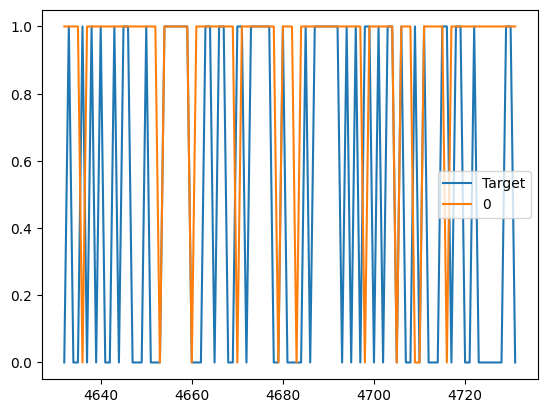

In [60]:
combined.plot()

In [61]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds= model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index,name="Predictions")
    combined =pd.concat([test["Target"],preds],axis=1)
    return combined


In [65]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [66]:
predictions = backtest(history,model,predictors)

In [67]:
predictions["Predictions"].value_counts()

Predictions
0    1500
1     698
Name: count, dtype: int64

In [69]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5573065902578797

In [70]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.551865
0    0.448135
Name: count, dtype: float64

In [75]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_avg_close = history["Close"].rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    history[ratio_column] = history["Close"] / rolling_avg_close

    trend_column = f"Trend_{horizon}"
    history[trend_column] = history["Target"].shift(1).rolling(horizon).sum()

    new_predictors += [ratio_column, trend_column]

In [76]:
history


,Date,Open,High,Low,Close,Volume,Return,Close_Lag1,Return_Lag1,MA7,...,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
34,2006-07-14 04:00:00,4.072045,4.077521,4.006338,4.010901,9663000,-0.017218,4.081172,-0.018221,4.171649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,2006-07-17 04:00:00,4.007250,4.030978,3.992649,4.014552,6458000,0.000910,4.010901,-0.017218,4.135015,...,1.000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2006-07-18 04:00:00,4.014550,4.024589,3.985347,4.006337,12483000,-0.002046,4.014552,0.000910,4.106072,...,0.998976,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2006-07-19 04:00:00,4.007250,4.147791,3.997212,4.132277,15840000,0.031435,4.006337,-0.002046,4.090297,...,1.015474,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,2006-07-20 04:00:00,4.143227,4.177906,4.115849,4.156916,8829000,0.005963,4.132277,0.031435,4.079867,...,1.002972,2.0,1.022814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2025-03-11 04:00:00,537.200012,538.049988,522.250000,525.799988,4582600,-0.021075,537.119995,-0.017649,549.685713,...,0.989350,0.0,0.967323,1.0,0.969646,31.0,1.071623,136.0,1.331572,524.0
4728,2025-03-12 04:00:00,530.510010,532.710022,519.260010,524.640015,2810800,-0.002206,525.799988,-0.021075,542.502860,...,0.998896,0.0,0.977293,0.0,0.967775,30.0,1.068785,135.0,1.328077,524.0
4729,2025-03-13 04:00:00,524.500000,528.530029,517.710022,519.830017,2375800,-0.009168,524.640015,-0.002206,537.468576,...,0.995395,0.0,0.979274,0.0,0.959250,30.0,1.058582,134.0,1.315330,524.0
4730,2025-03-14 04:00:00,522.599976,528.409973,520.950012,527.640015,2369500,0.015024,519.830017,-0.009168,533.088579,...,1.007456,1.0,1.001203,1.0,0.973679,31.0,1.074041,134.0,1.334493,524.0


In [77]:
history =history.dropna()

In [78]:
history

,Date,Open,High,Low,Close,Volume,Return,Close_Lag1,Return_Lag1,MA7,...,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1034,2010-07-06 04:00:00,18.874282,19.060259,18.325605,18.507881,16346000,-0.013513,18.761398,0.000345,18.998187,...,0.993198,1.0,0.992491,2.0,0.892826,25.0,0.886871,132.0,1.145632,512.0
1035,2010-07-07 04:00:00,18.557841,19.205521,18.557841,19.205521,12675000,0.037694,18.507881,-0.013513,18.857338,...,1.018498,1.0,1.025088,3.0,0.930064,25.0,0.919564,132.0,1.187699,512.0
1036,2010-07-08 04:00:00,19.261963,19.430358,19.122248,19.399824,9491000,0.010117,19.205521,0.037694,18.834987,...,1.005033,2.0,1.025041,4.0,0.942899,26.0,0.928052,133.0,1.198574,513.0
1037,2010-07-09 04:00:00,19.502520,19.941092,19.296188,19.941092,11867000,0.027901,19.399824,0.010117,19.002625,...,1.013758,2.0,1.040596,4.0,0.972662,26.0,0.953094,133.0,1.230813,513.0
1038,2010-07-12 04:00:00,19.710709,19.971630,19.550639,19.769926,7162000,-0.008584,19.941092,0.027901,19.191510,...,0.995690,1.0,1.020918,3.0,0.967864,26.0,0.944109,132.0,1.219073,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,2025-03-11 04:00:00,537.200012,538.049988,522.250000,525.799988,4582600,-0.021075,537.119995,-0.017649,549.685713,...,0.989350,0.0,0.967323,1.0,0.969646,31.0,1.071623,136.0,1.331572,524.0
4728,2025-03-12 04:00:00,530.510010,532.710022,519.260010,524.640015,2810800,-0.002206,525.799988,-0.021075,542.502860,...,0.998896,0.0,0.977293,0.0,0.967775,30.0,1.068785,135.0,1.328077,524.0
4729,2025-03-13 04:00:00,524.500000,528.530029,517.710022,519.830017,2375800,-0.009168,524.640015,-0.002206,537.468576,...,0.995395,0.0,0.979274,0.0,0.959250,30.0,1.058582,134.0,1.315330,524.0
4730,2025-03-14 04:00:00,522.599976,528.409973,520.950012,527.640015,2369500,0.015024,519.830017,-0.009168,533.088579,...,1.007456,1.0,1.001203,1.0,0.973679,31.0,1.074041,134.0,1.334493,524.0


In [79]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50,random_state=1)

In [80]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds= model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index,name="Predictions")
    combined =pd.concat([test["Target"],preds],axis=1)
    return combined

In [81]:
predictions = backtest(history,model,new_predictors)

In [82]:
predictions["Predictions"].value_counts()

Predictions
0.0    882
1.0    316
Name: count, dtype: int64

In [83]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5348101265822784